In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')

Dataset Source: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data

In [48]:
# Keeping the main data frame in a separate data variable for future use
data = pd.read_csv("heart_attack_prediction_dataset.csv")

In [49]:
# Copying data data frame into a new variable for manupulation
df = data.copy()

In [50]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0.0,0.0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1.0,1.0,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1.0,0.0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1.0,NaN,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1.0,1.0,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [51]:
df.shape

(8763, 26)

<h2>Initial Obseravation</h2>
<p>We have 26 columns (25 features & 1 class) to work with.<br>As we are predicting heart attack risk, we select Heart Attack Risk as our class column.<br>Because Heart Attack Risk only consists of 0 & 1, this is a classification problem.<br>Our dataset consists of both Qualitative & Quantitive features.</p>

<h4>Class Imbalance</h4>

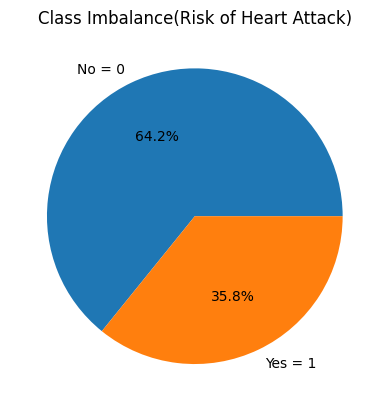

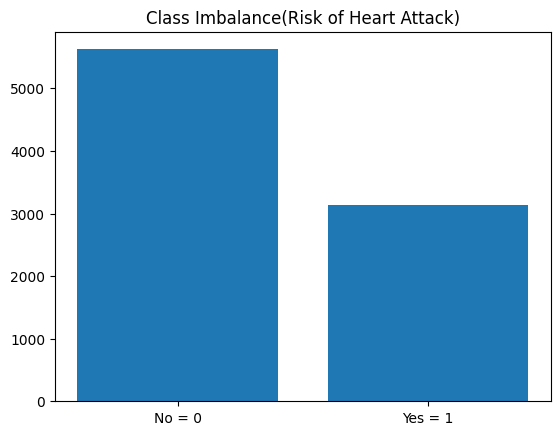

In [102]:
# Get pie chart slice labels
labels = ["No = 0", "Yes = 1"]

# Get pie chart slice values
values = df["Heart Attack Risk"].value_counts().to_numpy()

# Create a pie chart of the number of customers for each country origin
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

plt.bar(x = labels, height = values)
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

<p>As we can see, class imbalance is present in the dataset</p>

<h1>Data Preprocessing</h1>

<h3>Handling Null Values</h3>

In [52]:
# Detect Columns Containing Null Values

df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           4
Family History                     3
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            4
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            2
Income                             0
BMI                                5
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [53]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [54]:
#Dropping Patient ID, Country, Continent, Hemisphere

df = df.drop(["Patient ID","Country","Continent","Hemisphere"], axis = 1)

# Number of unique values in each column

df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8759
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8761
Income                             8615
BMI                                8758
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Heart Attack Risk                     2
dtype: int64

In [55]:
#For Categorical values we use mode for imputation and for 
#Quantitative values we use mean for imputation

#The columns containing null values are-

# Name                             N-Null     N-Unique
# Diabetes                           4           2
# Family History                     3           2
# Exercise Hours Per Week            4         8759
# Sedentary Hours Per Day            2         8761
# BMI                                5         8758

In [56]:
# Handle both type of values(Categorical & Quantitative) and impute them

for col_name in df.columns:
    
    col_data = df[col_name]
    
    if col_data.isna().sum() > 0 and col_data.nunique() <= 2:
        col_data = col_data.fillna(value = col_data.mode().iloc[0],inplace = True) # Handle Categorical Values

    elif col_data.isna().sum() > 0 and col_data.nunique() > 2: # Handle Quantitative Values
        col_data = col_data.fillna(value = col_data.mean(),inplace = True)
    


In [57]:
# Check the current null value state

df.isna().sum()

Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64

<h3>Encoding</h3>

In [58]:
# Checking Datatypes

df.dtypes

Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
dtype: object

In [59]:
# Spliting Blood Pressure
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [60]:
# Convert the columns to numeric
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'])
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'])

In [61]:
#Dropping Blood Pressure
df = df.drop("Blood Pressure", axis = 1)

In [62]:
# Columns we need to encode- 
# - Sex
# - Blood Pressure
# - Diet

In [63]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [64]:
#Initialize LabelEncoder
encoder = LabelEncoder()

In [69]:
#Handle Encoding

for col_name in df.columns:
    
    if df[col_name].dtype == "object":
        print(df[col_name])
        df[col_name] = encoder.fit_transform(df[[col_name]])


0         Male
1         Male
2       Female
3         Male
4         Male
         ...  
8758      Male
8759    Female
8760      Male
8761      Male
8762    Female
Name: Sex, Length: 8763, dtype: object
0         Average
1       Unhealthy
2         Healthy
3         Average
4       Unhealthy
          ...    
8758      Healthy
8759      Healthy
8760      Average
8761    Unhealthy
8762      Healthy
Name: Diet, Length: 8763, dtype: object


In [71]:
#Check current datatype state

df.dtypes

Age                                  int64
Sex                                  int32
Cholesterol                          int64
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int32
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
BP_Systolic                          int64
BP_Diastolic                         int64
dtype: obje

In [72]:
df.dtypes

Age                                  int64
Sex                                  int32
Cholesterol                          int64
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int32
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
BP_Systolic                          int64
BP_Diastolic                         int64
dtype: obje

<h2>Correlation Matrix</h2>

In [109]:
#We already removed Patient ID, Country, Continent, Hemisphere, Income as they are irrelevant for predicting Heart Attack Risk
df.shape

(8763, 23)

In [110]:
#We have 22 features to work with (excluding the Heart Attack Risk column

In [111]:


corr = df.corr()

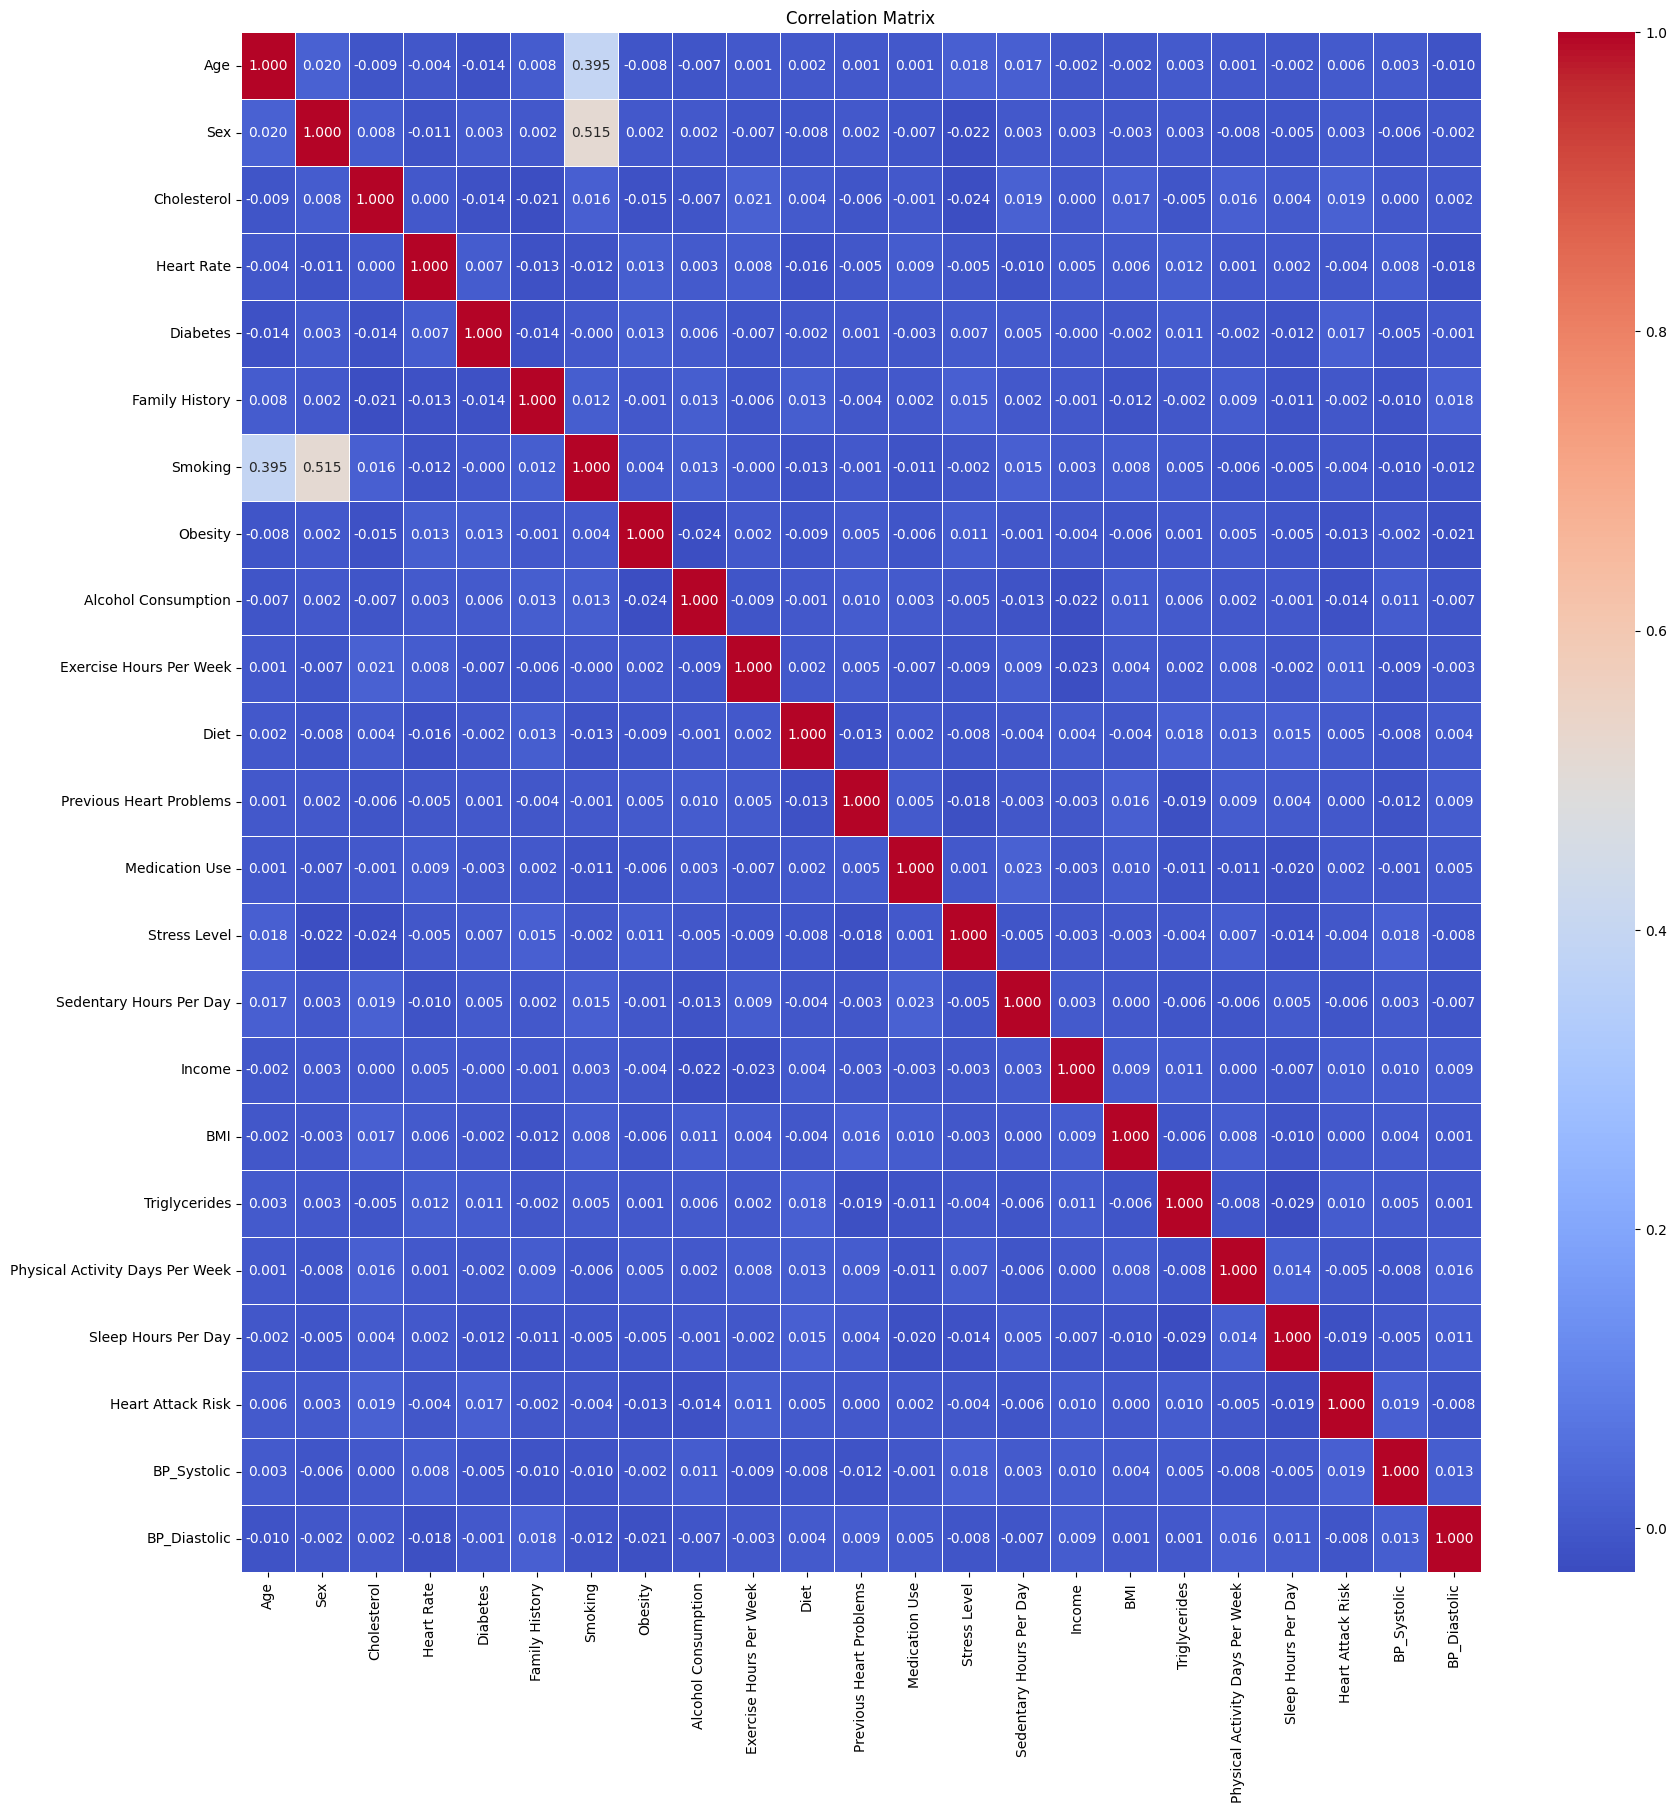

In [112]:
#Correlation Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<ul>
<h5>Key Findings</h5>
<li>Heart Attack risk has highest correlation with Diabetes, Cholestrol and Exercise Hours Per Weak</li>
<li>Heart attack Risk is not much dependent on Sedentary Hours Per Day</li>
<li>Alcohol Consumption has no stronger link with Heart Attack Risk</li>
<li>Smoking is not a major cause of Heart Attack</li> 
</ul>


<h1>Train Test Split(Before Scaling)</h1>

In [122]:
X = df.drop("Heart Attack Risk",axis = 1)

In [123]:
y = df["Heart Attack Risk"]

In [124]:
#import train test split
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h1>Model Training<h1>

<h3>KNN(Before Scaling)</h3>

In [148]:
#Import KNNClassifier
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn_before_scaling = KNeighborsClassifier(n_neighbors=3)

In [150]:
knn_before_scaling.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [151]:
y_predicted_train =  knn_before_scaling.predict(X_train)

In [152]:
from sklearn.metrics import accuracy_score

In [154]:
print("Train Score:",accuracy_score(y_train,y_predicted_train))

Train Score: 0.767362243234431


In [155]:
y_predicted_test =  knn_before_scaling.predict(X_test)

In [156]:
print("Test Score:",accuracy_score(y_test,y_predicted_test))

Test Score: 0.5671357930772156


<h2>Scaling<h2>

In [162]:
df.dtypes

Age                                  int64
Sex                                  int32
Cholesterol                          int64
Heart Rate                           int64
Diabetes                           float64
Family History                     float64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int32
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
BP_Systolic                          int64
BP_Diastolic                         int64
dtype: obje

In [163]:
df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8760
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8762
Income                             8615
BMI                                8759
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Heart Attack Risk                     2
BP_Systolic                          91
BP_Diastolic                         51
dtype: int64

In [164]:
df.head(5)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0.0,0.0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1.0,1.0,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1.0,0.0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1.0,0.0,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1.0,1.0,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


In [165]:
#We can scale those columns where the nunique value is greater than 10

In [167]:
from sklearn.preprocessing import MinMaxScaler

In [168]:
scaler = MinMaxScaler()

In [170]:
for col_name in df.columns:
    if df[col_name].nunique()>10: 
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [171]:
df.head(5)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,0.680556,1,0.314286,0.457143,0.0,0.0,1,0,0,0.208326,...,9,0.551234,0.862268,0.602363,0.332468,0,6,0,0.755556,0.56
1,0.041667,1,0.960714,0.828571,1.0,1.0,1,1,1,0.090557,...,1,0.413584,0.949316,0.417945,0.266234,1,7,0,0.833333,0.66
2,0.041667,0,0.728571,0.457143,1.0,0.0,0,0,0,0.103815,...,9,0.788642,0.768939,0.462573,0.723377,4,4,0,0.933333,0.78
3,0.916667,1,0.939286,0.471429,1.0,0.0,1,0,1,0.491376,...,9,0.637413,0.377210,0.839394,0.451948,3,4,0,0.811111,0.80
4,0.666667,1,0.707143,0.757143,1.0,1.0,1,1,0,0.290147,...,6,0.126150,0.501954,0.173077,0.261039,1,5,0,0.011111,0.56


<h1>Train Test Split(After Scaling)<h2>

In [172]:
X = df.drop("Heart Attack Risk",axis = 1)

In [173]:
y = df["Heart Attack Risk"]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h3>KNN(After Scaling)</h3>

In [204]:
knn_after_scaling = KNeighborsClassifier()

In [205]:
knn_after_scaling.fit(X_train,y_train)

KNeighborsClassifier()

In [206]:
y_predicted_train =  knn_after_scaling.predict(X_train)

In [207]:
print("Train Score:",accuracy_score(y_train,y_predicted_train))

Train Score: 0.7138897945875449


In [208]:
y_predicted_test =  knn_after_scaling.predict(X_test)

In [209]:
print("Test Score:",accuracy_score(y_test,y_predicted_test))

Test Score: 0.5663750475465956


<h1>Random Forest Classifier</h1>

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rfc = RandomForestClassifier()

In [222]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [223]:
y_predicted = rfc.predict(X_test)

In [224]:
accuracy_score(y_test,y_predicted)

0.6386458729554964

In [225]:
y_train_predicted = rfc.predict(X_train)

In [226]:
accuracy_score(y_train,y_train_predicted)

1.0

<h1>Decision Tree Classifier</h1>

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
dtc = DecisionTreeClassifier()

In [228]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [229]:
y_train_predicted = rfc.predict(X_train)

In [230]:
accuracy_score(y_train,y_train_predicted)

1.0

In [231]:
y_predicted = rfc.predict(X_test)

In [232]:
accuracy_score(y_test,y_predicted)

0.6432103461392165